In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load the training data
df_train = pd.read_csv("Google_Stock_Price_Train.csv")




In [24]:
# Scale the training data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train_scaled = scaler.fit_transform(df_train[['Open']])

In [25]:
# Build the training data for the LSTM
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(df_train_scaled[i-60:i, 0])
    y_train.append(df_train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [26]:
# Reshape the training data for the LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))


In [27]:
# Compile and fit the LSTM model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)



Epoch 1/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0502
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0062
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0050
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0048
Epoch 5/100
1198/1198 [==============================] - 4s 4ms/sample - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0047
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0047
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0049
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0047
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0041
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0042
Epoch 12/100
1198/1198 [============================

1198/1198 [==============================] - 4s 3ms/sample - loss: 0.0014
Epoch 96/100
1198/1198 [==============================] - 4s 3ms/sample - loss: 0.0016
Epoch 97/100
1198/1198 [==============================] - 4s 3ms/sample - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 4s 3ms/sample - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 4s 3ms/sample - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 4s 3ms/sample - loss: 0.0015


In [33]:
# Load the test data
df_test = pd.read_csv("Google_Stock_Price_Test.csv")

In [29]:
# Concatenate the training and test data
df_total = pd.concat((df_train['Open'], df_test['Open']), axis=0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values

# Reshape and scale the input data
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

c:\users\k chandana\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [30]:
# Create the testing data for the LSTM
X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)




In [31]:
# Reshape the testing data for the LSTM
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions using the LSTM model
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Get the actual stock prices
actual_stock_price = df_test[['Open']].values


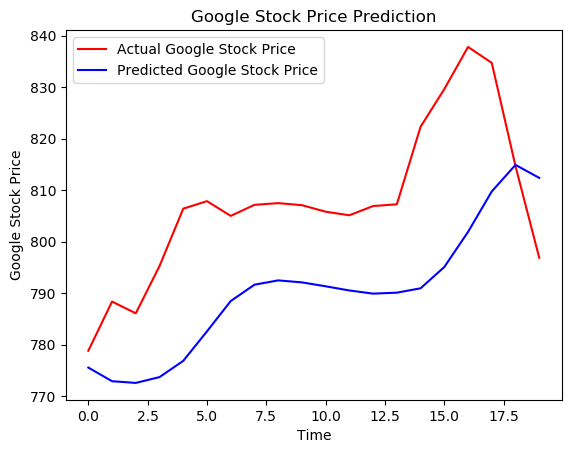

In [34]:
# Plot the results
plt.plot(actual_stock_price, color='red', label='Actual Google Stock Price')
plt.plot(predictions, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.layers import Dropout
